## Problem Statement

In [76]:
import pandas as pd
import numpy as np


In [2]:
df_train = pd.read_csv("Classification_Loan_Default.csv")

In [3]:
df_train.head().T

0          1                  2  \
Unnamed: 0.1                               0          1                  2   
Unnamed: 0                            122508      25685              63991   
ID                                    147398      50575              88881   
loan_limit                                cf         cf                 cf   
Gender                     Sex Not Available       Male  Sex Not Available   
approv_in_adv                          nopre      nopre                pre   
loan_type                              type1      type1              type3   
loan_purpose                              p3         p3                 p4   
Credit_Worthiness                         l1         l1                 l1   
open_credit                             nopc       nopc               nopc   
business_or_commercial                 nob/c      nob/c              nob/c   
loan_amount                           166500     576500             326500   
rate_of_interest                         NaN        NaN               3.99   
Interest_rate_spread                     NaN        NaN              0.257   
Upfront_charges                          NaN        NaN                0.0   
term                                   360.0      360.0              360.0   
Neg_ammortization                    not_neg    neg_amm            not_neg   
interest_only                        not_int    not_int            not_int   
lump_sum_payment                        lpsm   not_lpsm           not_lpsm   
property_value                           NaN   718000.0           398000.0   
construction_type                         sb         sb                 sb   
occupancy_type                            pr         pr                 pr   
Secured_by                              home       home               home   
total_units                               1U         1U                 1U   
income                                2400.0    11160.0                NaN   
credit_type                             EQUI       CRIF                EXP   
Credit_Score                             820        523                832   
co-applicant_credit_type                 EXP        CIB                CIB   
Age                                      NaN        NaN               47.0   
submission_of_application            to_inst   not_inst            to_inst   
LTV                                      NaN  80.292479          82.035176   
Security_Type                         direct     direct             direct   
Status                                     1          1                  0   

                                   3          4  
Unnamed: 0.1                       3          4  
Unnamed: 0                    144321      37842  
ID                            169211      62732  
loan_limit                       ncf         cf  
Gender                        Female      Joint  
approv_in_adv                    pre      nopre  
loan_type                      type1      type2  
loan_purpose                      p3         p3  
Credit_Worthiness                 l1         l2  
open_credit                     nopc       nopc  
business_or_commercial         nob/c        b/c  
loan_amount                   776500     596500  
rate_of_interest                 NaN      4.625  
Interest_rate_spread             NaN     1.0186  
Upfront_charges                  NaN        0.0  
term                           360.0      360.0  
Neg_ammortization            not_neg    not_neg  
interest_only                not_int    not_int  
lump_sum_payment            not_lpsm   not_lpsm  
property_value             1308000.0   708000.0  
construction_type                 sb         sb  
occupancy_type                    pr         pr  
Secured_by                      home       home  
total_units                       1U         1U  
income                        8700.0    12180.0  
credit_type                     CRIF        CIB  
Credit_Score                     847    

In [4]:
df_train = df_train.drop(['Unnamed: 0.1'], axis = 1)

In [5]:
df_train

Unnamed: 0      ID loan_limit             Gender approv_in_adv  \
0          122508  147398         cf  Sex Not Available         nopre   
1           25685   50575         cf               Male         nopre   
2           63991   88881         cf  Sex Not Available           pre   
3          144321  169211        ncf             Female           pre   
4           37842   62732         cf              Joint         nopre   
...           ...     ...        ...                ...           ...   
22295       46947   71837         cf  Sex Not Available         nopre   
22296       93736  118626         cf               Male         nopre   
22297       41853   66743         cf  Sex Not Available         nopre   
22298       22856   47746         cf               Male         nopre   
22299       58653   83543         cf  Sex Not Available         nopre   

      loan_type loan_purpose Credit_Worthiness open_credit  \
0         type1           p3                l1        nopc   
1         type1           p3                l1        nopc   
2         type3           p4                l1        nopc   
3         type1           p3                l1        nopc   
4         type2           p3                l2        nopc   
...         ...          ...               ...         ...   
22295     type1           p4                l1        nopc   
22296     type1           p4                l1        nopc   
22297     type1           p3                l1        nopc   
22298     type2           p1                l1        nopc   
22299     type2           p3                l1        nopc   

      business_or_commercial  ...  total_units   income  credit_type  \
0                      nob/c  ...           1U   2400.0         EQUI   
1                      nob/c  ...           1U  11160.0         CRIF   
2                      nob/c  ...           1U      NaN          EXP   
3                      nob/c  ...           1U   8700.0         CRIF   
4                        b/c  ...           1U  12180.0          CIB   
...                      ...  ...          ...      ...          ...   
22295                  nob/c  ...           1U   2820.0          EXP   
22296                  nob/c  ...           1U   3900.0          CIB   
22297                  nob/c  ...           1U   3480.0          CIB   
22298                    b/c  ...           1U   5340.0          EXP   
22299                    b/c  ...           1U   2100.0         EQUI   

       Credit_Score  co-applicant_credit_type   Age submission_of_application  \
0               820                       EXP   NaN                   to_inst   
1               523                       CIB   NaN                  not_inst   
2               832                       CIB  47.0                   to_inst   
3               847                       CIB  54.0                   to_inst   
4               573                       EXP  53.0                  not_inst   
...             ...                       ...   ...                       ...   
22295           880                       EXP  37.0                   to_inst   
22296           730                       CIB  41.0                  not_inst   
22297           676                       CIB  50.0                   to_inst   
22298           844                       CIB  51.0                  not_inst   
22299           829                       EXP  60.0                   to_inst   

             LTV  Security_Type Status  
0            NaN         direct      1  
1      80.292479         direct      1  
2      82.035176         direct      0  
3      59.365443         direct      1  
4      84.251412         direct      0  
...          ...            ...    ...  
22295  48.766447         direct      0  
22296  67.857143         direct      0  
22297  76.006711         direct      0  
22298  91.330645         direct      0  
22299        NaN         direct      1  

[22300 rows x 32 columns]

In [6]:
df_train.shape

(22300, 32)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 22300 non-null  int64  
 1   ID                         22300 non-null  int64  
 2   loan_limit                 21804 non-null  object 
 3   Gender                     22300 non-null  object 
 4   approv_in_adv              22163 non-null  object 
 5   loan_type                  22300 non-null  object 
 6   loan_purpose               22282 non-null  object 
 7   Credit_Worthiness          22300 non-null  object 
 8   open_credit                22300 non-null  object 
 9   business_or_commercial     22300 non-null  object 
 10  loan_amount                22300 non-null  int64  
 11  rate_of_interest           16877 non-null  float64
 12  Interest_rate_spread       16840 non-null  float64
 13  Upfront_charges            16414 non-null  flo

In [8]:
correlation = df_train['Unnamed: 0'].corr(df_train['Status'])
correlation

0.00491561176544294

In [9]:
df_train.describe()

Unnamed: 0             ID   loan_amount  rate_of_interest  \
count   22300.000000   22300.000000  2.230000e+04      16877.000000   
mean    74604.745202   99494.745202  3.309291e+05          4.053078   
std     42719.077600   42719.077600  1.827137e+05          0.568405   
min         6.000000   24896.000000  2.650000e+04          2.250000   
25%     37859.250000   62749.250000  1.965000e+05          3.625000   
50%     75016.500000   99906.500000  2.965000e+05          3.990000   
75%    111718.250000  136608.250000  4.365000e+05          4.500000   
max    148669.000000  173559.000000  3.006500e+06          7.000000   

       Interest_rate_spread  Upfront_charges          term  property_value  \
count          16840.000000     16414.000000  22297.000000    2.006900e+04   
mean               0.443284      3198.788559    335.251783    4.986159e+05   
std                0.516256      3208.040787     58.294289    3.738144e+05   
min               -1.084100         0.000000     96.000000    8.000000e+03   
25%                0.073900       577.572500    360.000000    2.780000e+05   
50%                0.385900      2587.890000    360.000000    4.180000e+05   
75%                0.784150      4792.812500    360.000000    6.180000e+05   
max                2.147800     53485.780000    360.000000    1.650800e+07   

              income  Credit_Score           Age           LTV        Status  
count   20990.000000  22300.000000  22281.000000  20069.000000  22300.000000  
mean     6985.523583    700.354170     42.613797     72.772953      0.244843  
std      6527.140125    116.185578     10.918767     57.953254      0.430004  
min         0.000000    500.000000     24.000000      0.967478      0.000000  
25%      3720.000000    599.000000     33.000000     60.416667      0.000000  
50%      5700.000000    701.000000     43.000000     75.082237      0.000000  
75%      8580.000000    801.000000     52.000000     85.663842      0.000000  
max    312000.000000    900.000000     61.000000   7831.250000      1.000000

In [10]:
df_train.columns   

Index(['Unnamed: 0', 'ID', 'loan_limit', 'Gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'Age', 'submission_of_application', 'LTV', 'Security_Type', 'Status'],
      dtype='object')

In [11]:
df_train.isnull().sum()

Unnamed: 0                      0
ID                              0
loan_limit                    496
Gender                          0
approv_in_adv                 137
loan_type                       0
loan_purpose                   18
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             5423
Interest_rate_spread         5460
Upfront_charges              5886
term                            3
Neg_ammortization              25
interest_only                   0
lump_sum_payment                0
property_value               2231
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       1310
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
Age                            19
submission_of_application      37
LTV           

In [12]:
df_train.isnull().mean() * 100

Unnamed: 0                    0.000000
ID                            0.000000
loan_limit                    2.224215
Gender                        0.000000
approv_in_adv                 0.614350
loan_type                     0.000000
loan_purpose                  0.080717
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.318386
Interest_rate_spread         24.484305
Upfront_charges              26.394619
term                          0.013453
Neg_ammortization             0.112108
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.004484
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        5.874439
credit_type                   0.000000
Credit_Score             

In [13]:
df_train.dtypes

Unnamed: 0                     int64
ID                             int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
A

In [14]:
df_null = ['loan_limit','approv_in_adv','loan_purpose','rate_of_interest','Interest_rate_spread','Upfront_charges','term','Neg_ammortization','property_value','income','Age','submission_of_application','LTV']

In [15]:
df_train['loan_limit'].fillna(df_train['loan_limit'].mode()[0], inplace=True)

In [16]:
df_train['approv_in_adv'].fillna(df_train['approv_in_adv'].mode()[0], inplace=True)

In [17]:
df_train['loan_purpose'].fillna(df_train['loan_purpose'].mode()[0], inplace=True)

In [18]:
df_train['submission_of_application'].fillna(df_train['submission_of_application'].mode()[0], inplace=True)

In [19]:
df_train['Neg_ammortization'].fillna(df_train['Neg_ammortization'].mode()[0], inplace=True)

In [20]:
df_train['rate_of_interest'].fillna(df_train['rate_of_interest'].mean(), inplace=True)

In [21]:
df_train['Interest_rate_spread'].fillna(df_train['Interest_rate_spread'].mean(), inplace=True)

In [22]:
df_train['Upfront_charges'].fillna(df_train['Upfront_charges'].mean(), inplace=True)

In [23]:
df_train['term'].fillna(df_train['term'].mean(), inplace=True)

In [24]:
df_train['property_value'].fillna(df_train['property_value'].mean(), inplace=True)

In [25]:
df_train['income'].fillna(df_train['income'].mean(), inplace=True)

In [26]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [27]:
df_train['LTV'].fillna(df_train['LTV'].mean(), inplace=True)

In [28]:
df_train.isnull().sum()

Unnamed: 0                   0
ID                           0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
Age                          0
submission_of_application    0
LTV                          0
Security_Type                0
Status                       0
dtype: i

In [29]:
for i in df_train.columns:
    print("<-------------------------------------------------->")
    print(i)
    print(df_train[i].value_counts())
    print("<-------------------------------------------------->")

<-------------------------------------------------->
Unnamed: 0
122508    1
33666     1
113767    1
126577    1
121720    1
         ..
129818    1
57310     1
12912     1
53416     1
58653     1
Name: Unnamed: 0, Length: 22300, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
ID
147398    1
58556     1
138657    1
151467    1
146610    1
         ..
154708    1
82200     1
37802     1
78306     1
83543     1
Name: ID, Length: 22300, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
loan_limit
cf     20860
ncf     1440
Name: loan_limit, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Gender
Joint                6306
Male                 6188
Sex Not Available    5698
Female               4108
Name: Gender, dtype: int64
<-------------------------------------------------->
<-------

## Visualizations

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

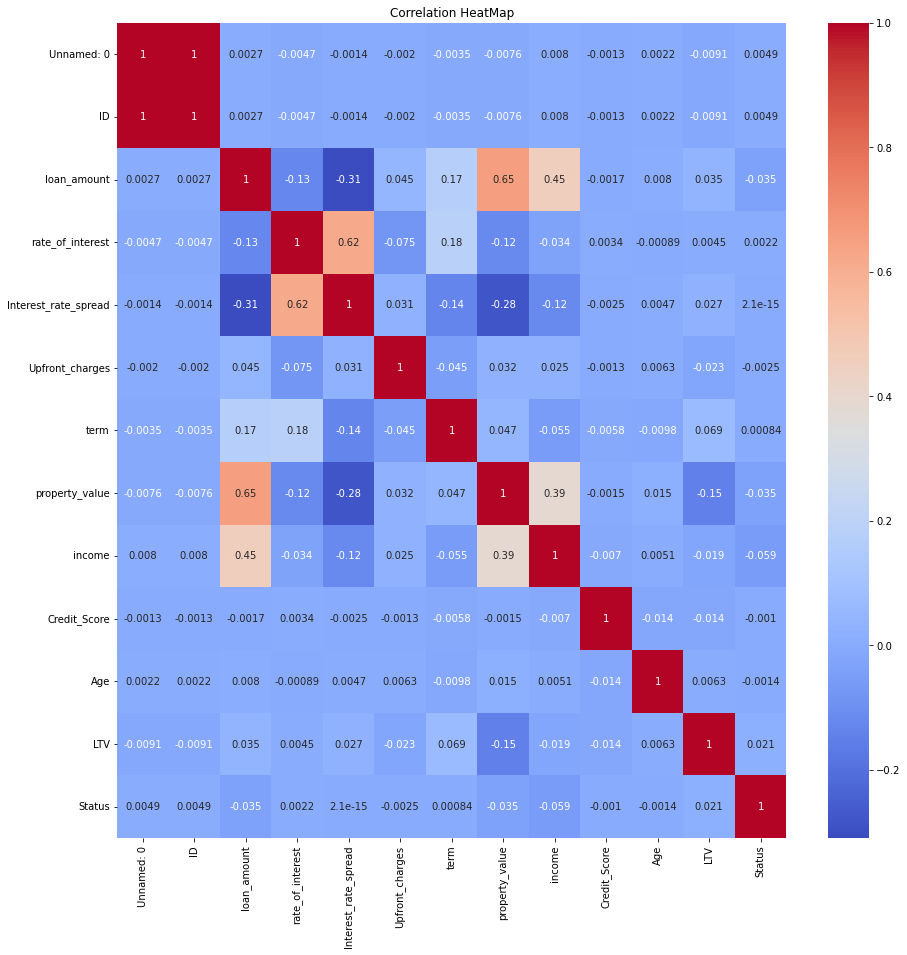

In [31]:
plt.subplots(figsize=(15,15))

plt.title("Correlation HeatMap")
sns.heatmap(df_train.corr(), annot = True, cmap = "coolwarm")
plt.show()

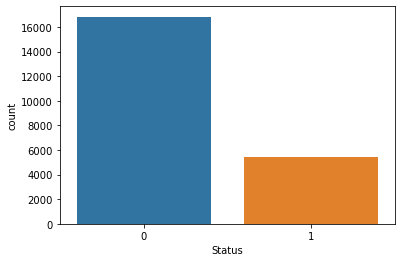

In [32]:
sns.countplot(x = "Status", data = df_train)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

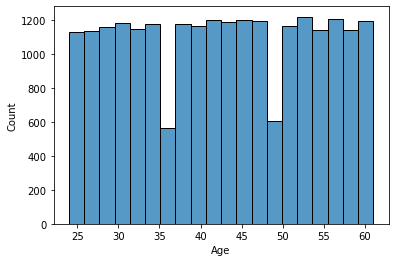

In [35]:
sns.histplot(data=df_train, x='Age', bins=20)

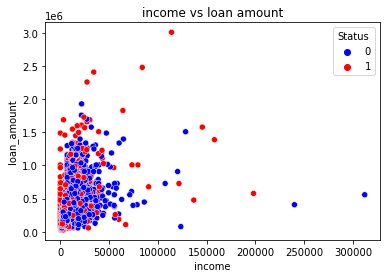

In [50]:
sns.scatterplot(x = "income", y = "loan_amount", hue = "Status", data = df_train, palette = ['blue', 'red'])
plt.title('income vs loan amount')
plt.xlabel('income')
plt.ylabel('loan_amount')
plt.show()

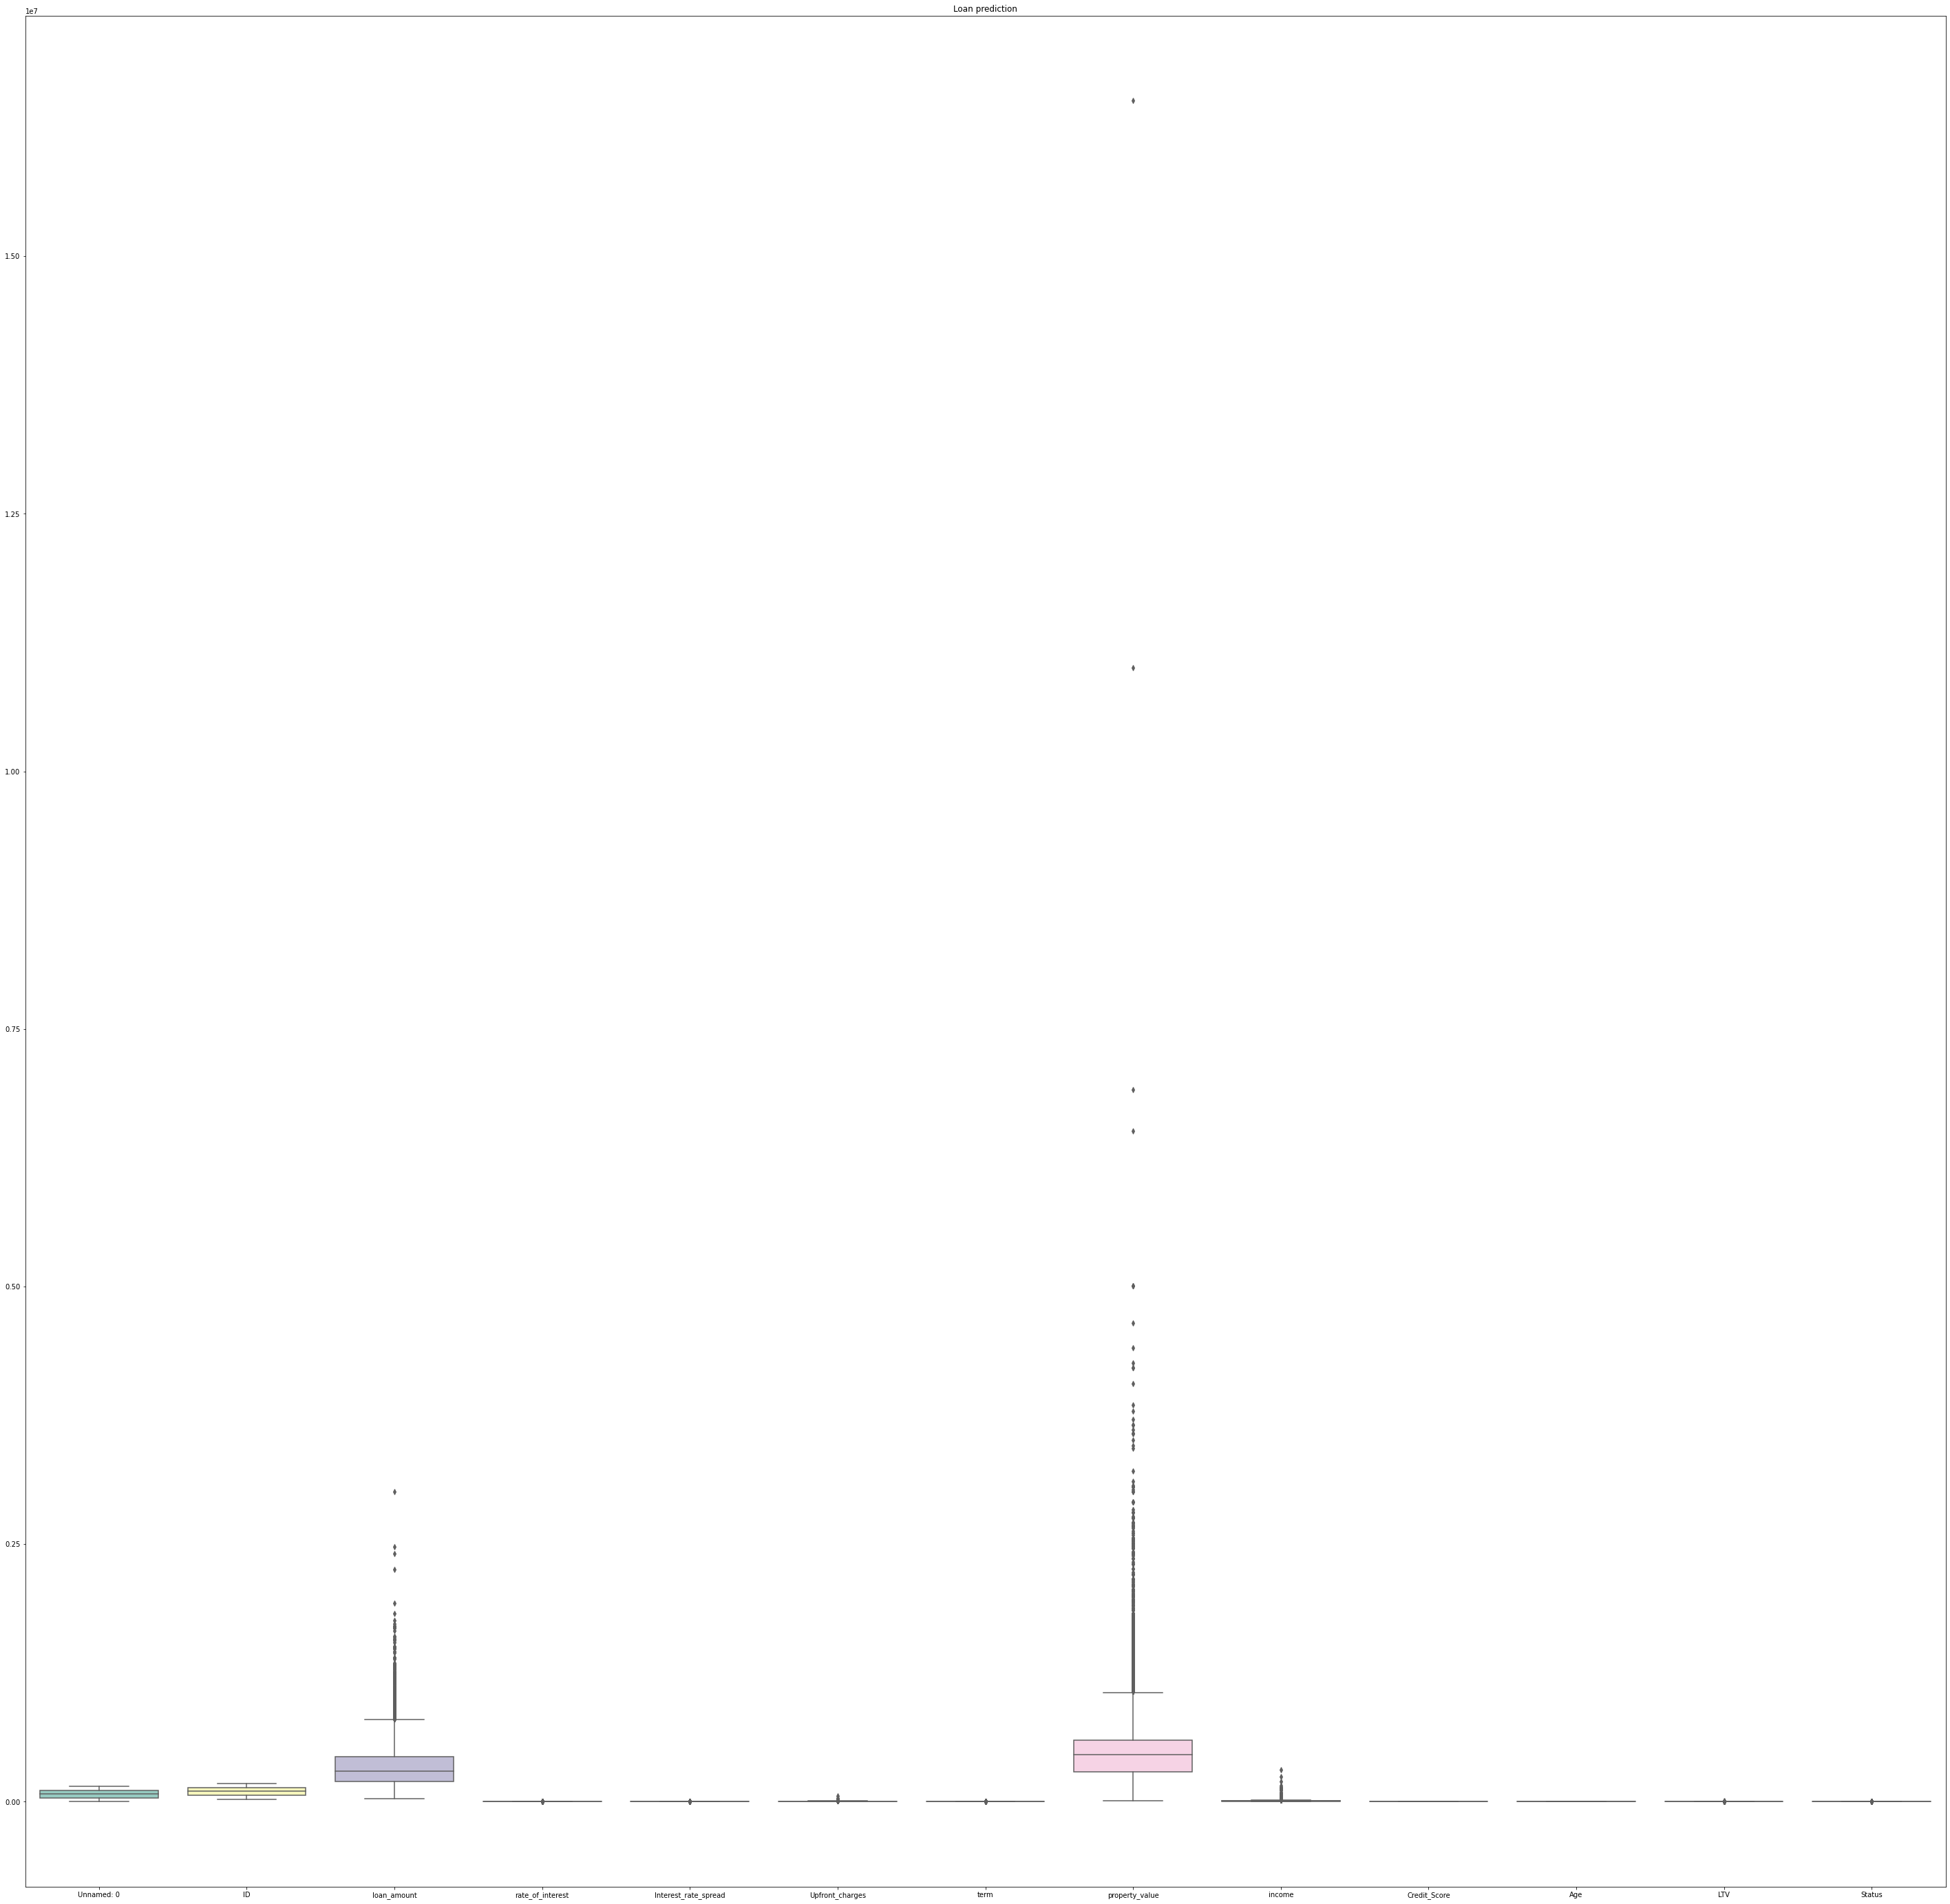

In [51]:
# Create the box plot
fig, ax = plt.subplots(figsize=(50,50))
sns.boxplot(data=df_train, palette="Set3")
plt.title("Loan prediction")
plt.show()

In [61]:
categorical_columns=['loan_limit','Gender','approv_in_adv','loan_type', 'loan_purpose','Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment',
                    'construction_type','occupancy_type','Secured_by','total_units','credit_type','co-applicant_credit_type','submission_of_application','Security_Type']
                    

In [62]:
for i in categorical_columns:
  df_train[i]=df_train[i].astype('category').cat.codes

In [63]:
df_train.dtypes

Unnamed: 0                     int64
ID                             int64
loan_limit                      int8
Gender                          int8
approv_in_adv                   int8
loan_type                       int8
loan_purpose                    int8
Credit_Worthiness               int8
open_credit                     int8
business_or_commercial          int8
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization               int8
interest_only                   int8
lump_sum_payment                int8
property_value               float64
construction_type               int8
occupancy_type                  int8
Secured_by                      int8
total_units                     int8
income                       float64
credit_type                     int8
Credit_Score                   int64
co-applicant_credit_type        int8
A

In [64]:
column_stats = df_train['loan_amount'].describe()
print(column_stats)

count    2.230000e+04
mean     3.309291e+05
std      1.827137e+05
min      2.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.006500e+06
Name: loan_amount, dtype: float64


In [65]:
column_stats = df_train['property_value'].describe()
print(column_stats)

count    2.230000e+04
mean     4.986159e+05
std      3.546218e+05
min      8.000000e+03
25%      2.880000e+05
50%      4.580000e+05
75%      5.980000e+05
max      1.650800e+07
Name: property_value, dtype: float64


In [66]:
column_stats = df_train['income'].describe()
print(column_stats)

count     22300.000000
mean       6985.523583
std        6332.513382
min           0.000000
25%        3840.000000
50%        6000.000000
75%        8340.000000
max      312000.000000
Name: income, dtype: float64


In [68]:
df_train['loan_amount'] = np.where(df_train['loan_amount'] >5.365000e+05 , np.log(df_train['loan_amount']), df_train['loan_amount'])

In [69]:
df_train['property_value'] = np.where(df_train['property_value'] >6.365000e+05 , np.log(df_train['property_value']), df_train['property_value'])

In [70]:
df_train['income'] = np.where(df_train['income'] >10000, np.log(df_train['income']), df_train['income'])

C:\Users\Chaitu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
column_stats = df_train['loan_amount'].describe()
print(column_stats)

count    22300.000000
mean        12.558751
std          0.569703
min         10.184900
25%         12.188418
50%         12.599802
75%         12.986544
max         14.916287
Name: loan_amount, dtype: float64


In [72]:
column_stats = df_train['property_value'].describe()
print(column_stats)

count     22300.000000
mean     294521.683248
std      198603.496147
min          13.366094
25%      138000.000000
50%      308000.000000
75%      488000.000000
max      628000.000000
Name: property_value, dtype: float64


In [73]:
column_stats = df_train['income'].describe()
print(column_stats)

count    22300.000000
mean      4434.800258
std       2838.803363
min          0.000000
25%       2400.000000
50%       4560.000000
75%       6900.000000
max       9960.000000
Name: income, dtype: float64


In [74]:
train_df=df_train.drop(['Unnamed: 0','ID'],axis=1)

In [80]:
# Split the dataset into training and testing sets
# Use 70% of the data for training and 30% for testing
train_data = train_df.sample(frac=0.7, random_state=42)
test_data = train_df.drop(train_data.index)

# Separate the features and target variables
X_train = train_data.drop('Status', axis=1)
y_train = train_data['Status']
X_test = test_data.drop('Status', axis=1)
y_test = test_data['Status']

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15610, 29)
(15610,)
(6690, 29)
(6690,)


In [82]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
#y_train=y_train[:,np.newaxis]

## Model Building

In [83]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, variance, and prior probability for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [84]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [85]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification accuracy", accuracy(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification accuracy", accuracy(y_test, predictions))

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:38: RuntimeWarning: invalid value encountered in true_divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:38: RuntimeWarning: divide by zero encountered in true_divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:40: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


Naive Bayes train classification accuracy 0.7572069186418963
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification accuracy 0.750373692077728


In [86]:
## precision


def precision(y_train,ypred):
    true_positives = 0
    false_positives = 0
    for i in range(len(y_train)):
        if ypred[i] == 1:
            if y_train[i] == ypred[i]:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_positives) 

In [87]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification precision", precision(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification precision", precision(y_test, predictions))

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:38: RuntimeWarning: invalid value encountered in true_divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Naive Bayes train classification precision 0.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification precision 0.0


C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:38: RuntimeWarning: divide by zero encountered in true_divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:40: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


In [88]:
## recall

def recall(y_train,ypred):
    true_positives = 0
    false_negatives = 0
    for i in range(len(y_train)):
        if y_train[i] == 1:
            if y_train[i] == ypred[i]:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_negatives) 

In [89]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification recall", recall(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification recall", recall(y_test, predictions))

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:38: RuntimeWarning: invalid value encountered in true_divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:38: RuntimeWarning: divide by zero encountered in true_divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\Chaitu\AppData\Local\Temp\ipykernel_4684\2853148615.py:40: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


Naive Bayes train classification recall 0.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification recall 0.0
